In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as ptl
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/JohnEric-Creator/FreeDataScienceAcquisition/refs/heads/main/Titanic-Dataset.csv')


In [ ]:
#Data Cleaning
#ajustando valores NaN da coluna age com fillna
df['Age'].fillna(df['Age'].mean(), inplace=True)
df

<ipython-input-654-a9dba844eed3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.699118   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Cabin Embarked  
0        1      0         A/5 21171   7.2500   NaN        S  
1        1      0          PC 17599  71.2833   C85        C  
2        0      0  STON/O2. 3101282   7.9250   NaN        S  
3        1      0            113803  53.1000  C123        S  
4        0      0            373450   8.0500   NaN        S  
..     ...    ...               ...      ...   ...      ...  
886      0      0            211536  13.0000   NaN        S  
887      0      0            112053  30.0000   B42        S  
888      1      2        W./C. 6607  23.4500   NaN        S  
889      0      0            111369  30.0000  C148        C  
890      0      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [ ]:
#Data cleaning de NaN
#Dropar as linhas (registros) que tem NaN nas colunas Fare ou Embarked
df = df.dropna(subset=['Fare', 'Embarked'])

In [ ]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.699118   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Cabin Embarked  
0        1      0         A/5 21171   7.2500   NaN        S  
1        1      0          PC 17599  71.2833   C85        C  
2        0      0  STON/O2. 3101282   7.9250   NaN        S  
3        1      0            113803  53.1000  C123        S  
4        0      0            373450   8.0500   NaN        S  
..     ...    ...               ...      ...   ...      ...  
886      0      0            211536  13.0000   NaN        S  
887      0      0            112053  30.0000   B42        S  
888      1      2        W./C. 6607  23.4500   NaN        S  
889      0      0            111369  30.0000  C148        C  
890      0      0            370376   7.7500   NaN        Q  

[889 rows x 12 columns]

In [ ]:
#Engenharia de atributos(fature engineering)
df['Family'] = df['SibSp'] + df['Parch'] + 1
df

<ipython-input-657-62342d45d069>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family'] = df['SibSp'] + df['Parch'] + 1


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.699118   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Cabin Embarked  Family  
0        1      0         A/5 21171   7.2500   NaN        S       2  
1        1      0          PC 17599  71.2833   C85        C       2  
2        0      0  STON/O2. 3101282   7.9250   NaN        S       1  
3        1      0            113803  53.1000  C123        S       2  
4        0      0            373450   8.0500   NaN        S       1  
..     ...    ...               ...      ...   ...      ...     ...  
886      0      0            211536  13.0000   NaN        S       1  
887      0      0            112053  30.0000   B42        S       1  
888      1      2        W./C. 6607  23.4500   NaN        S       4  
889      0      0            111369  30.0000  C148        C       1  
890      0      0            370376   7.7500   NaN        Q       1  

[889 rows x 13 columns]

In [ ]:
#Engenharia de atributos(fature engineering)
#Criação de variaveis dummies(one-hot enconding)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True, dtype=int)
df = pd.get_dummies(df, columns=['Pclass'], drop_first=True, dtype=int)
#df['Sex'] = df['Sex'].map({'male' : 1, 'family' : 0})
#df['Embarked_Q'] = df['Embarked_Q'].map({True : 1, False : 0})
#df['Embarked_S'] = df['Embarked_S'].map({True : 1, False : 0})


In [ ]:
df['Sex'] = df['Sex'].map({'male' : 1, 'female' : 0})

In [ ]:
df['Age'].describe()

count    889.000000
mean      29.653446
std       12.968366
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
#Discretização de variaveis continuos(bin/intervalos) da colunas age
bins = [0,12,18,50,100]
labels =['Criança', 'Adoslecente', 'Adulto', 'Idoso']
df['FaixaEtaria'] = pd.cut(x=df['Age'],bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['FaixaEtaria'], drop_first=True, dtype=int)



In [ ]:
df.sort_values(by='Age')

PassengerId  Survived                                  Name  Sex    Age  \
803          804         1       Thomas, Master. Assad Alexander    1   0.42   
755          756         1             Hamalainen, Master. Viljo    1   0.67   
469          470         1         Baclini, Miss. Helene Barbara    0   0.75   
644          645         1                Baclini, Miss. Eugenie    0   0.75   
78            79         1         Caldwell, Master. Alden Gates    1   0.83   
..           ...       ...                                   ...  ...    ...   
116          117         0                  Connors, Mr. Patrick    1  70.50   
96            97         0             Goldschmidt, Mr. George B    1  71.00   
493          494         0               Artagaveytia, Mr. Ramon    1  71.00   
851          852         0                   Svensson, Mr. Johan    1  74.00   
630          631         1  Barkworth, Mr. Algernon Henry Wilson    1  80.00   

     SibSp  Parch    Ticket     Fare Cabin  Family  Embarked_Q  Embarked_S  \
803      0      1      2625   8.5167   NaN       2           0           0   
755      1      1    250649  14.5000   NaN       3           0           1   
469      2      1      2666  19.2583   NaN       4           0           0   
644      2      1      2666  19.2583   NaN       4           0           0   
78       0      2    248738  29.0000   NaN       3           0           1   
..     ...    ...       ...      ...   ...     ...         ...         ...   
116      0      0    370369   7.7500   NaN       1           1           0   
96       0      0  PC 17754  34.6542    A5       1           0           0   
493      0      0  PC 17609  49.5042   NaN       1           0           0   
851      0      0    347060   7.7750   NaN       1           0           1   
630      0      0     27042  30.0000   A23       1           0           1   

     Pclass_2  Pclass_3  FaixaEtaria_Adoslecente  FaixaEtaria_Adulto  \
803         0         1                        0                   0   
755         1         0                        0                   0   
469         0         1                        0                   0   
644         0         1                        0                   0   
78          1         0                        0                   0   
..        ...       ...                      ...                 ...   
116         0         1                        0                   0   
96          0         0                        0                   0   
493         0         0                        0                   0   
851         0         1                        0                   0   
630         0         0                        0                   0   

     FaixaEtaria_Idoso  
803                  0  
755                  0  
469                  0  
644                  0  
78                   0  
..                 ...  
116                  1  
96                   1  
493                  1  
851                  1  
630                  1  

[889 rows x 18 columns]

In [ ]:
df

PassengerId  Survived                                               Name  \
0              1         0                            Braund, Mr. Owen Harris   
1              2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3         1                             Heikkinen, Miss. Laina   
3              4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5         0                           Allen, Mr. William Henry   
..           ...       ...                                                ...   
886          887         0                              Montvila, Rev. Juozas   
887          888         1                       Graham, Miss. Margaret Edith   
888          889         0           Johnston, Miss. Catherine Helen "Carrie"   
889          890         1                              Behr, Mr. Karl Howell   
890          891         0                                Dooley, Mr. Patrick   

     Sex        Age  SibSp  Parch            Ticket     Fare Cabin  Family  \
0      1  22.000000      1      0         A/5 21171   7.2500   NaN       2   
1      0  38.000000      1      0          PC 17599  71.2833   C85       2   
2      0  26.000000      0      0  STON/O2. 3101282   7.9250   NaN       1   
3      0  35.000000      1      0            113803  53.1000  C123       2   
4      1  35.000000      0      0            373450   8.0500   NaN       1   
..   ...        ...    ...    ...               ...      ...   ...     ...   
886    1  27.000000      0      0            211536  13.0000   NaN       1   
887    0  19.000000      0      0            112053  30.0000   B42       1   
888    0  29.699118      1      2        W./C. 6607  23.4500   NaN       4   
889    1  26.000000      0      0            111369  30.0000  C148       1   
890    1  32.000000      0      0            370376   7.7500   NaN       1   

     Embarked_Q  Embarked_S  Pclass_2  Pclass_3  FaixaEtaria_Adoslecente  \
0             0           1         0         1                        0   
1             0           0         0         0                        0   
2             0           1         0         1                        0   
3             0           1         0         0                        0   
4             0           1         0         1                        0   
..          ...         ...       ...       ...                      ...   
886           0           1         1         0                        0   
887           0           1         0         0                        0   
888           0           1         0         1                        0   
889           0           0         0         0                        0   
890           1           0         0         1                        0   

     FaixaEtaria_Adulto  FaixaEtaria_Idoso  
0                     1                  0  
1                     1                  0  
2                     1                  0  
3                     1                  0  
4                     1                  0  
..                  ...                ...  
886                   1                  0  
887                   1                  0  
888                   1                  0  
889                   1                  0  
890                   1                  0  

[889 rows x 18 columns]

In [ ]:
bins = [0,7.91,14.45,31.0,512]
labels =['LOW', 'MIDLOW', 'MID-HIGH', 'HIGH']
df['faixa_tarifa'] = pd.cut(x=df['Fare'],bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['faixa_tarifa'],drop_first=True, dtype=int)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Family', 'Embarked_Q', 'Embarked_S',
       'Pclass_2', 'Pclass_3', 'FaixaEtaria_Adoslecente', 'FaixaEtaria_Adulto',
       'FaixaEtaria_Idoso', 'faixa_tarifa_MIDLOW', 'faixa_tarifa_MID-HIGH',
       'faixa_tarifa_HIGH'],
      dtype='object')

In [ ]:
df

PassengerId  Survived                                               Name  \
0              1         0                            Braund, Mr. Owen Harris   
1              2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3         1                             Heikkinen, Miss. Laina   
3              4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5         0                           Allen, Mr. William Henry   
..           ...       ...                                                ...   
886          887         0                              Montvila, Rev. Juozas   
887          888         1                       Graham, Miss. Margaret Edith   
888          889         0           Johnston, Miss. Catherine Helen "Carrie"   
889          890         1                              Behr, Mr. Karl Howell   
890          891         0                                Dooley, Mr. Patrick   

     Sex        Age  SibSp  Parch            Ticket     Fare Cabin  ...  \
0      1  22.000000      1      0         A/5 21171   7.2500   NaN  ...   
1      0  38.000000      1      0          PC 17599  71.2833   C85  ...   
2      0  26.000000      0      0  STON/O2. 3101282   7.9250   NaN  ...   
3      0  35.000000      1      0            113803  53.1000  C123  ...   
4      1  35.000000      0      0            373450   8.0500   NaN  ...   
..   ...        ...    ...    ...               ...      ...   ...  ...   
886    1  27.000000      0      0            211536  13.0000   NaN  ...   
887    0  19.000000      0      0            112053  30.0000   B42  ...   
888    0  29.699118      1      2        W./C. 6607  23.4500   NaN  ...   
889    1  26.000000      0      0            111369  30.0000  C148  ...   
890    1  32.000000      0      0            370376   7.7500   NaN  ...   

     Embarked_Q  Embarked_S  Pclass_2  Pclass_3  FaixaEtaria_Adoslecente  \
0             0           1         0         1                        0   
1             0           0         0         0                        0   
2             0           1         0         1                        0   
3             0           1         0         0                        0   
4             0           1         0         1                        0   
..          ...         ...       ...       ...                      ...   
886           0           1         1         0                        0   
887           0           1         0         0                        0   
888           0           1         0         1                        0   
889           0           0         0         0                        0   
890           1           0         0         1                        0   

     FaixaEtaria_Adulto  FaixaEtaria_Idoso  faixa_tarifa_MIDLOW  \
0                     1                  0                    0   
1                     1                  0                    0   
2                     1                  0                    1   
3                     1                  0                    0   
4                     1                  0                    1   
..                  ...                ...                  ...   
886                   1                  0                    1   
887                   1                  0                    0   
888                   1                  0                    0   
889                   1                  0                    0   
890                   1                  0                    0   

     faixa_tarifa_MID-HIGH  faixa_tarifa_HIGH  
0                        0                  0  
1                        0                  1  
2                        0                  0  
3                        0                  1  
4                        0                  0  
..                     ...                ...  
886                      0                  0  
887                      1   

In [ ]:
#Separar em conjunto de entrada e saida(target ou alvo)
#separar em variaveis independentes(x) e dependentes(y ou target ou alvo)
x = df[['Sex','Family', 'Embarked_Q', 'Embarked_S',
       'Pclass_2', 'Pclass_3', 'FaixaEtaria_Adoslecente', 'FaixaEtaria_Adulto',
       'FaixaEtaria_Idoso', 'faixa_tarifa_MIDLOW', 'faixa_tarifa_MID-HIGH',
       'faixa_tarifa_HIGH']]

y = df['Survived']




In [ ]:
#separar os dados em treinamentos e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.92, random_state=212)

In [ ]:
#modelo de regressão logística para o dataset do titanic
model = KNeighborsClassifier(n_neighbors=25) #n_neighbors == k
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
#previsão dos dados do dataset do titanic
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_test

254    0
113    0
552    0
153    0
413    0
      ..
204    1
43     1
692    1
223    0
563    0
Name: Survived, Length: 818, dtype: int64

In [ ]:
# Metrica de avaliação do modelo
acuracia = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"acuracia: {acuracia}")
print(f"f1_score; {f1_score}")
print(f"Relatorio: {report}")

acuracia: 0.6161369193154034
f1_score; 0.042682926829268296
Relatorio:               precision    recall  f1-score   support

           0       0.61      1.00      0.76       498
           1       0.88      0.02      0.04       320

    accuracy                           0.62       818
   macro avg       0.74      0.51      0.40       818
weighted avg       0.72      0.62      0.48       818



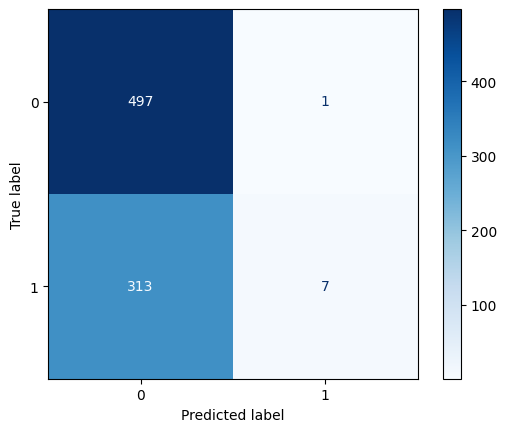

In [ ]:
#Matrix de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
display.plot(cmap = plt.cm.Blues, values_format='g')
ptl.show()

In [ ]:
#Meus dados
x_test.columns

Index(['Sex', 'Family', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3',
       'FaixaEtaria_Adoslecente', 'FaixaEtaria_Adulto', 'FaixaEtaria_Idoso',
       'faixa_tarifa_MIDLOW', 'faixa_tarifa_MID-HIGH', 'faixa_tarifa_HIGH'],
      dtype='object')

In [ ]:
#Meus dados
my_dict = {
    'Sex' : 1,
    'Family':1 ,
    'Embarked_Q': 1 ,
    'Embarked_S' : 1,
    'Pclass_2' : 1,
    'Pclass_3' : 1,
    'FaixaEtaria_Adoslecente' : 0,
    'FaixaEtaria_Adulto' : 1,
    'FaixaEtaria_Idoso' : 0,
    'faixa_tarifa_MIDLOW' : 0,
    'faixa_tarifa_MID-HIGH' : 0,
    'faixa_tarifa_HIGH' : 1}

nome =['viccenzo']
my_test = pd.DataFrame(my_dict, index=nome)
my_test

Sex  Family  Embarked_Q  Embarked_S  Pclass_2  Pclass_3  \
viccenzo    1       1           1           1         1         1   

          FaixaEtaria_Adoslecente  FaixaEtaria_Adulto  FaixaEtaria_Idoso  \
viccenzo                        0                   1                  0   

          faixa_tarifa_MIDLOW  faixa_tarifa_MID-HIGH  faixa_tarifa_HIGH  
viccenzo                    0                      0                  1

In [ ]:
y_pred = model.predict(my_test)
print(f"Sobreviveu? {y_pred}")

Sobreviveu? [0]
